# Binary Search Trees (BSTs)
----

In [1]:
## Define some function useful for testing
import random

## generate an array of n random integers up to b
def get_random_array(n, b = 50):
    return [random.randint(0, b) for _ in range(n)]

Hashing-based data structures are efficient solutions to index a set of keys providing three operations:
- Insert a new key in the set
- Delete a key from the set
- Search a key in the set (and return its associated value).

Binary Search Tree (BST) extends the set of operations with more ones.

- Min/max keys in the set
- Predecessor of a value, i.e., largest key in the set which is smaller than the given one
- Successor of a value, i.e., smallest key in the set which is greater than the given one

Implementing the above operations gives a **sorted map** (or ordered map).


Notice that if the set would be **static** (i.e., no insert and delete) the problem can be easily solved with 
binary search on a sorted array. This is the goal of the first exercise. 

---
### Exercise: Static sorted map
Complete and test the implementation below. You have to use binary search to solve predecessor and successor queries on a sorted array.

In [2]:
class StaticSortedMap:
    def __init__(self, A): # assume A is already sorted
        self.sorted_map = A[:] # copy input array
        
    def min(self):
        return self.sorted_map[0]
    
    def max(self):
        return self.sorted_map[-1]
        
    def search(self, key): ## in our pseudocode BinarySearch(A, s, e, key)
        def __binary_search(p, e, key):
            # implementation of the recursive pseudocode
            # TODO in __binary_search() function---:
            # If the key is in the set, returns  True, p  where p is the position 
            # of the key in the array.
            #
            # If the key is not in the set, returns False, p where p is the position where 
            # the key should be inserted to keep the array sorted.
            #
            # Implement binary search!

            if p > e:
                return False, p

            q = (p+e) // 2

            if self.sorted_map[q] == key:
                return True, q
    
            if self.sorted_map[q] > key:
                return __binary_search(p, q-1, key)
            else:
                return __binary_search(q+1, e, key)
            
        return __binary_search(0, len(self.sorted_map), key)
        
    def predecessor(self, key):
        if key == self.min():
            return None, -1

        query = self.search(key)
        if query[0]: #if it finds the key
            prev = key #setting the element to search equal to the key
            i = query[1] #setting the position of the key as the current position

            while prev == key: #moving on the left until find a smaller number than the key
                i -= 1
                prev = self.sorted_map[i]
            return i, prev
        else:
            return query
        

    def successor(self, key):
        if key == self.max():
            return None, len(self.sorted_map)

        query = self.search(key)
        if query[0]: #if it finds the key
            next = key #setting the element to search equal to the key
            i = query[1] #setting the position of the key as the current position

            while next == key: #moving on the right until find a greater number than the key
                i += 1
                next = self.sorted_map[i]
            return i, next
        else:
            return query
        

In [3]:
## Test your implementation here

def test_StaticSortedMap():
    def get_random_array(n, b = 50):
        return [random.randint(0, b) for _ in range(n)]

    len_array = 10
    a = sorted(get_random_array(len_array, 1000))
    a[-2] = a[-1] #to test if the predecessor skip it

    ssm = StaticSortedMap(a)

    look_at = a[len(a)-1] #looking for the last element in the tree

    print(f'Looking for {look_at} in {a}')

    assert ssm.search(look_at) == (True, range(len_array)[-2]), 'Error must be very rare: On average the element found should be the one just before the last one'
    assert a.index(look_at) == range(len_array)[-2], 'The index should be the index just before the last one'
    assert ssm.predecessor(look_at) == (range(len_array)[-3], a[-3]), 'The predecessor should be the second element before the last one'
    assert ssm.successor(look_at) == (None, len(a)), "The successor shouldn't exist and it should return the position where to insert it"

test_StaticSortedMap()

Looking for 999 in [48, 82, 230, 309, 342, 423, 506, 658, 999, 999]


---
## Sorted map with Binary Search Tree

In [4]:
class BinarySearchTree:
    # This is a Node class that is internal to the BinarySearchTree class
    class __Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def getVal(self): 
            return self.val

        def setVal(self, newval): 
            self.val = newval
            
        def getLeft(self): 
            return self.left
        
        def getRight(self): 
            return self.right
        
        def setLeft(self, newleft): 
            self.left = newleft
        
        def setRight(self, newright): 
            self.right = newright
            
        # This method deserves a little explanation. It does an inorder traversal
        # of the nodes of the tree yielding all the values. In this way, we get
        # the values in ascending order.       
        def __iter__(self):
            if self.left != None:
                for elem in self.left: 
                    yield elem
            yield self.val
            if self.right != None:
                for elem in self.right:
                    yield elem
                    
    # Below methods of the BinarySearchTree class.
    def __init__(self): 
        self.root = None
         
    def insert(self, val):   
        # The __insert function is recursive and is not a passed a self parameter. It is a # static function (not a method of the class) but is hidden inside the insert
        # function so users of the class will not know it exists.
        def __insert(root, val): 
            if root == None:
                return BinarySearchTree.__Node(val)
            if val < root.getVal(): 
                root.setLeft( __insert(root.getLeft(), val) )
            else: 
                root.setRight( __insert(root.getRight(), val) )
            return root
        
        self.root = __insert(self.root, val)
        

In [5]:
a = get_random_array(100)

bst = BinarySearchTree()

for x in a: 
    bst.insert(x)

print([x for x in bst.root][:10])
    
assert [x for x in bst.root] == sorted(a), "FAIL insert!"


## It works with strings as well

a = ["ciao", "aaa", "zzz", "zzzW"]

bst_strings = BinarySearchTree()

for string in a:
    bst_strings.insert(string)

print([x for x in bst_strings.root])

assert [x for x in bst_strings.root] == sorted(a), "FAIL!"

[0, 1, 1, 2, 2, 2, 2, 3, 4, 5]
['aaa', 'ciao', 'zzz', 'zzzW']


### Exercise: Binary Search Tree
Extend the previous implementation of Binary Search Trees to support **search(x)** operation. Test your implementation.

In [6]:
class BinarySearchTree:
    # This is a Node class that is internal to the BinarySearchTree class
    class __Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def getVal(self): 
            return self.val

        def setVal(self, newval): 
            self.val = newval
            
        def getLeft(self): 
            return self.left
        
        def getRight(self): 
            return self.right
        
        def setLeft(self, newleft): 
            self.left = newleft
        
        def setRight(self, newright): 
            self.right = newright
            
        # This method deserves a little explanation. It does an inorder traversal
        # of the nodes of the tree yielding all the values. In this way, we get
        # the values in ascending order.       
        def __iter__(self):
            if self.left != None:
                for elem in self.left: 
                    yield elem
            yield self.val
            if self.right != None:
                for elem in self.right:
                    yield elem
                    
    # Below methods of the BinarySearchTree class.
    def __init__(self): 
        self.root = None
        
    def insert(self, val):   
        # The __insert function is recursive and is not a passed a self parameter. It is a # static function (not a method of the class) but is hidden inside the insert
        # function so users of the class will not know it exists.
        def __insert(root, val): 
            if root == None:
                return BinarySearchTree.__Node(val)
            if val < root.getVal(): 
                root.setLeft( __insert(root.getLeft(), val) )
            else: 
                root.setRight( __insert(root.getRight(), val) )
            return root
        
        self.root = __insert(self.root, val)

################################ SEARCH IMPLEMENTATION ################################

    def search(self, key):
        def __search(root, val, parent_node):
            ######## Base cases ########
            if root is None: #if the key is not found
                return root

            if root.val == val: #if the key 
                if parent_node is None:
                    print(val, 'is the key of the root node')
                elif val < parent_node.val:
                    print('The input key is a left node of the key', parent_node.val)
                else:
                    print('The input key is a right node of the key', parent_node.val)
                return root
                
            ######## Recursive part ########
            # The key is smaller than the root's key
            if val < root.val:
                return __search(root.getLeft(), val, root)
            # The key is greater
            return __search(root.getRight(), val, root)

        return __search(self.root, key, None)

In [7]:
a = get_random_array(100)

bst = BinarySearchTree()

for x in a: 
    bst.insert(x)

print([x for x in bst.root][:10])
    
assert [x for x in bst.root] == sorted(a), "FAIL insert!"

[0, 0, 0, 0, 0, 0, 1, 1, 2, 3]


In [8]:
[x for x in bst.search(3)]

The input key is a right node of the key 1


[2, 3]

In [9]:
def print_tree(root, val="val", left="left", right="right"):
    def display(root, val=val, left=left, right=right):
        """Returns list of strings, width, height, and horizontal coordinate of the root."""
        # No child.
        if getattr(root, right) is None and getattr(root, left) is None:
            line = '%s' % getattr(root, val)
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # Only left child.
        if getattr(root, right) is None:
            lines, n, p, x = display(getattr(root, left))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
            second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
            shifted_lines = [line + u * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

        # Only right child.
        if getattr(root, left) is None:
            lines, n, p, x = display(getattr(root, right))
            s = '%s' % getattr(root, val)
            u = len(s)
            first_line = s + x * '_' + (n - x) * ' '
            second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
            shifted_lines = [u * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

        # Two children.
        left, n, p, x = display(getattr(root, left))
        right, m, q, y = display(getattr(root, right))
        s = '%s' % getattr(root, val)
        u = len(s)
        first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
        second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
        if p < q:
            left += [n * ' '] * (q - p)
        elif q < p:
            right += [m * ' '] * (p - q)
        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
        return lines, n + m + u, max(p, q) + 2, n + u // 2

    lines, *_ = display(root, val, left, right)
    for line in lines:
        print(line)

In [10]:
print_tree(bst.root)

                             15_____________________________________________________________________________________________                                                         
                            /                                                                                               \                                                        
       ____________________14                                                  ____________________________________________37_____________________________________________           
      /                                                                       /                                                                                           \          
 _____1_______________                                     __________________26_________________________                                                       __________47_______   
/                     \                                   /                               

### Optional Exercise: 
Extend the previous implementation to support **delete(x)**, **min()**, **max()**, **predecessor(x)** and **successor(x)** operations and test your implementation.

### Delete

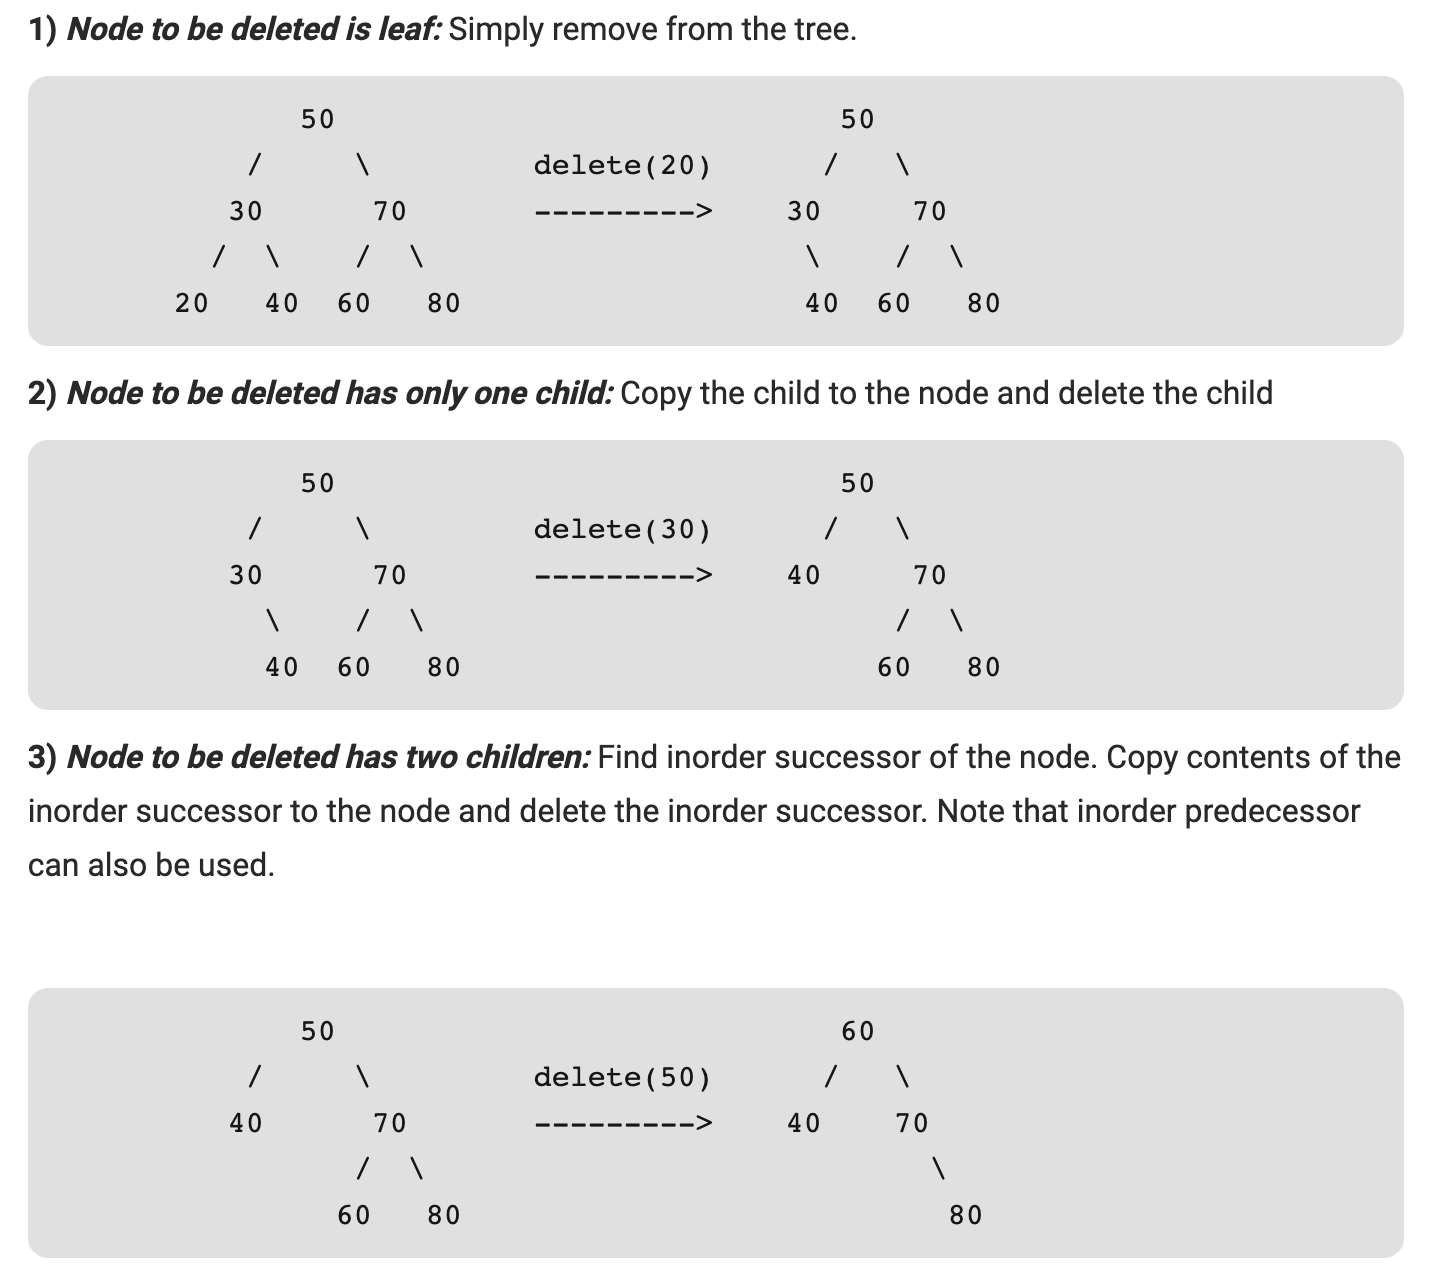

(this image is from GeeksforGeeks.org)